In [1]:
import numpy as np

In [2]:
from qiskit import *

Matplotlib is building the font cache; this may take a moment.


In [3]:
qc = QuantumCircuit(3)

In [4]:
qc.h(0)

In [5]:
qc.cx(0,1)
qc.cx(0,2)

In [6]:
qc.draw()

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [7]:
from qiskit import Aer

In [10]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
output = result.get_unitary(qc)
print(output)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.     

In [12]:
backend1 = Aer.get_backend('statevector_simulator')
job1 = execute(qc, backend1)
result1 = job1.result()
output1 = result1.get_statevector(qc)
print(output1)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [13]:
from qiskit.visualization import plot_state_city

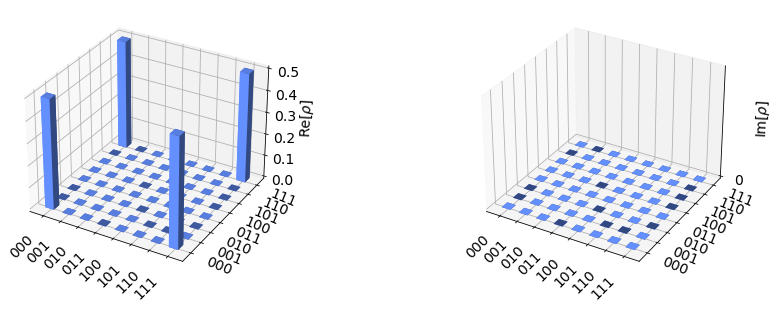

In [14]:
plot_state_city(output1)

In [15]:
from qiskit.visualization import plot_state_hinton, plot_state_paulivec

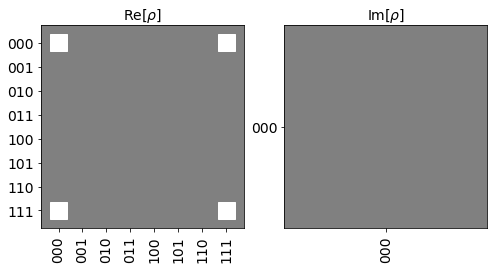

In [21]:
plot_state_hinton(output1)

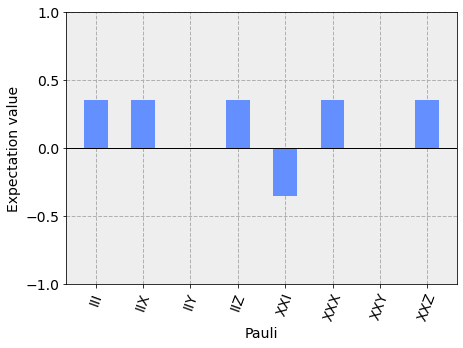

In [19]:
plot_state_paulivec(output)

In [22]:
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
meas.measure(range(3), range(3))

In [23]:
meas.draw()

░ ┌─┐      
q_0: ─░─┤M├──────
      ░ └╥┘┌─┐   
q_1: ─░──╫─┤M├───
      ░  ║ └╥┘┌─┐
q_2: ─░──╫──╫─┤M├
      ░  ║  ║ └╥┘
c: 3/════╩══╩══╩═
         0  1  2

In [24]:
totalqc = qc+meas
totalqc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

In [30]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(totalqc, backend_sim, shots= 1000)
result_sim = job_sim.result()
counts = result_sim.get_counts(totalqc)
print(counts)

{'000': 509, '111': 491}


In [26]:
from qiskit.visualization import plot_histogram

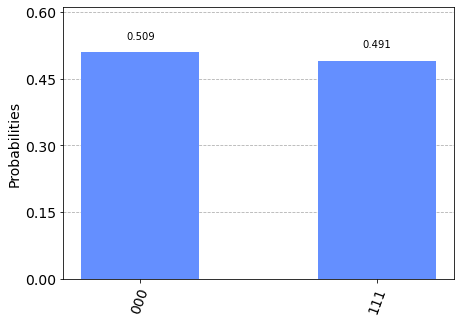

In [31]:
plot_histogram(counts)